In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests

In [17]:
# Connect to database
conn = sqlite3.connect('''database.sqlite''')

# Create cursor object
cur = conn.cursor()

In [18]:
# View Matches dataframe

cur.execute('''SELECT * FROM Matches;''')
Matches_df =pd.DataFrame(cur.fetchall())
Matches_df.columns = [x[0] for x in cur.description]
Matches_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [19]:
# View Teams dataframe

cur.execute('''SELECT * FROM Teams;''')
Teams_df = pd.DataFrame(cur.fetchall())
Teams_df.columns = [x[0] for x in cur.description]
Teams_df.head()

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [20]:
# View Teams_in_Matches dataframe

cur.execute('''SELECT * FROM Teams_in_Matches;''')
Teams_in_Matches_df = pd.DataFrame(cur.fetchall())
Teams_in_Matches_df.columns = [x[0] for x in cur.description]
Teams_in_Matches_df.head()

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [21]:
# View Unique_Teams dataframe

cur.execute('''SELECT * FROM Unique_Teams;''')
Unique_Teams_df = pd.DataFrame(cur.fetchall())
Unique_Teams_df.columns = [x[0] for x in cur.description]
Unique_Teams_df.head()

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


In [22]:
Unique_Teams_df.shape

(128, 2)

In [23]:
Matches_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [24]:
# Create a dataframe that shows the number of wins, draws and loses for each team during the 2011 season

cur.execute('''SELECT HomeTeam AS TeamName, (HomeGoalCount + AwayGoalCount) AS TotalGoals, (WinsH+WinsA) AS Wins, (DrawsH+DrawsA) AS Draws, (LosesH+LosesA) AS Loses
FROM (
SELECT HomeTeam, 
SUM(FTHG) AS HomeGoalCount,
SUM(CASE FTR
    WHEN 'H' THEN 1
    WHEN 'D' THEN 0
    WHEN 'A' THEN 0
END) AS WinsH,
SUM(CASE FTR
    WHEN 'H' THEN 0
    WHEN 'D' THEN 1
    WHEN 'A' THEN 0
END) AS DrawsH,
SUM (CASE FTR
    WHEN 'H' THEN 0
    WHEN 'D' THEN 0
    WHEN 'A' THEN 1
END) AS LosesH
FROM Matches
WHERE Season = '2011'
GROUP BY HomeTeam) AS t1
JOIN
(SELECT AwayTeam,
SUM(FTAG) As AwayGoalCount,
SUM(CASE FTR
    WHEN 'H' THEN 0
    WHEN 'D' THEN 0
    WHEN 'A' THEN 1
END) AS WinsA,
SUM(CASE FTR
    WHEN 'H' THEN 0
    WHEN 'D' THEN 1
    WHEN 'A' THEN 0
END) AS DrawsA,
SUM (CASE FTR
    WHEN 'H' THEN 1
    WHEN 'D' THEN 0
    WHEN 'A' THEN 0
END) AS LosesA
FROM Matches
WHERE Season = '2011'
GROUP BY AwayTeam) AS t2
ON
t1.HomeTeam = t2.AwayTeam;''')
Stats_df = pd.DataFrame(cur.fetchall())
Stats_df.columns = [x[0] for x in cur.description]
Stats_df.head()

,TeamName,TotalGoals,Wins,Draws,Loses
0,Aachen,30,6,13,15
1,Arsenal,74,21,7,10
2,Aston Villa,37,7,17,14
3,Augsburg,36,8,14,12
4,Bayern Munich,77,23,4,7


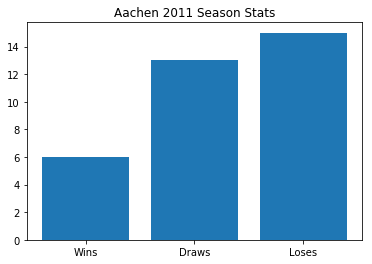

In [25]:
# Create histogram for each teams Wins, Draws and Loses

data = Stats_df.iloc[0].to_dict()
xaxis = list(data.keys())[2:]
y_values = list(data.values())[2:]

plt.bar(xaxis, y_values)
plt.title(list(data.values())[0] + ' 2011 Season Stats')
plt.show()

# DarkSky API

In [26]:
# View Matches dataframe

cur.execute('''SELECT * FROM Matches WHERE Season = '2011';''')
Matches_2011_df =pd.DataFrame(cur.fetchall())
Matches_2011_df.columns = [x[0] for x in cur.description]
Matches_2011_df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [27]:
Matches_2011_df = Matches_2011_df[:10]
Matches_2011_df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H
6,1098,D1,2011,2012-02-04,Hamburg,Bayern Munich,1,1,D
7,1099,D1,2011,2012-04-21,Werder Bremen,Bayern Munich,1,2,A
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H


In [33]:
Matches_2011_df['icon'] = 0
Matches_2011_df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,icon
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,0
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,0
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H,0
6,1098,D1,2011,2012-02-04,Hamburg,Bayern Munich,1,1,D,0
7,1099,D1,2011,2012-04-21,Werder Bremen,Bayern Munich,1,2,A,0
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,0
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,0


In [34]:
# Creat function to pull api from json file

def get_key(path):
    with open(path) as f:
        return json.load(f)
    

In [35]:
# Run function to get api key from json file and store under variable api_key

key = get_key("/Users/erikadauria/Flatiron/Projects/Soccer_in_the_Rain/.secret/darksky_api.json")
api_key = key['api_key']

In [36]:
url+api_key+latitude+longitude+time+'?exclude=minutely,hourly,currently,flags'

'https://api.darksky.net/forecast/0e633d9db28df0d633d323c64c700e5f/52.520008,13.404954,2012-03-31T12:00:00?exclude=minutely,hourly,currently,flags'

In [45]:
latitude = "/52.520008,"
longitude = "13.404954,"

url = 'https://api.darksky.net/forecast/'

for i in range(3):
    time = Matches_2011_df.Date[i]+'T12:00:00'
    response = requests.get(url+api_key+latitude+longitude+time+'?exclude=minutely,hourly,currently,flags')
    print(response.json())
    Matches_2011_df.icon[i]=response.json()['daily']['data'][0]['icon']

{'latitude': 52.520008, 'longitude': 13.404954, 'timezone': 'Europe/Berlin', 'daily': {'data': [{'time': 1333144800, 'summary': 'Possible drizzle in the morning and afternoon.', 'icon': 'rain', 'sunriseTime': 1333168980, 'sunsetTime': 1333215600, 'moonPhase': 0.28, 'precipIntensity': 0.0003, 'precipIntensityMax': 0.0029, 'precipIntensityMaxTime': 1333181100, 'precipProbability': 0.56, 'precipType': 'rain', 'temperatureHigh': 45.3, 'temperatureHighTime': 1333189200, 'temperatureLow': 29.61, 'temperatureLowTime': 1333256100, 'apparentTemperatureHigh': 36.47, 'apparentTemperatureHighTime': 1333189260, 'apparentTemperatureLow': 23.98, 'apparentTemperatureLowTime': 1333256160, 'dewPoint': 33.51, 'humidity': 0.7, 'windSpeed': 17.37, 'windGust': 40.29, 'windGustTime': 1333162620, 'windBearing': 302, 'cloudCover': 0.7, 'uvIndex': 3, 'uvIndexTime': 1333192200, 'visibility': 6.131, 'temperatureMin': 38.2, 'temperatureMinTime': 1333202400, 'temperatureMax': 46.98, 'temperatureMaxTime': 1333154280

/Users/erikadauria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


{'latitude': 52.520008, 'longitude': 13.404954, 'timezone': 'Europe/Berlin', 'daily': {'data': [{'time': 1323558000, 'summary': 'Mostly cloudy throughout the day.', 'icon': 'partly-cloudy-day', 'sunriseTime': 1323587280, 'sunsetTime': 1323615240, 'moonPhase': 0.54, 'precipIntensity': 0, 'precipIntensityMax': 0, 'precipProbability': 0, 'temperatureHigh': 41.54, 'temperatureHighTime': 1323605040, 'temperatureLow': 30.55, 'temperatureLowTime': 1323654360, 'apparentTemperatureHigh': 34.94, 'apparentTemperatureHighTime': 1323605040, 'apparentTemperatureLow': 23.2, 'apparentTemperatureLowTime': 1323658860, 'dewPoint': 29.25, 'humidity': 0.77, 'windSpeed': 9.66, 'windGust': 15.03, 'windGustTime': 1323561060, 'windBearing': 220, 'cloudCover': 0.52, 'uvIndex': 0, 'uvIndexTime': 1323601080, 'visibility': 6.212, 'temperatureMin': 32.54, 'temperatureMinTime': 1323640800, 'temperatureMax': 41.54, 'temperatureMaxTime': 1323605040, 'apparentTemperatureMin': 25.41, 'apparentTemperatureMinTime': 132364

In [44]:
Matches_2011_df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,icon
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,partly-cloudy-day
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,partly-cloudy-day
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,0
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H,0
6,1098,D1,2011,2012-02-04,Hamburg,Bayern Munich,1,1,D,0
7,1099,D1,2011,2012-04-21,Werder Bremen,Bayern Munich,1,2,A,0
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,0
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,0


In [53]:
new_Matches = Matches_2011_df[:955]

In [49]:
new_Matches.tail()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,icon
950,44833,E0,2011,2012-04-21,Bolton,Swansea,1,1,D,no rain
951,44834,E0,2011,2012-04-21,Fulham,Wigan,2,1,H,no rain
952,44835,E0,2011,2012-04-21,Newcastle,Stoke,3,0,H,no rain
953,44836,E0,2011,2012-04-21,QPR,Tottenham,1,0,H,no rain
954,44837,E0,2011,2012-04-22,Liverpool,West Brom,0,1,A,no rain


# Trying to tie it all together

In [100]:
new_Matches = new_Matches[new_Matches['icon'] == 'rain'].reset_index()
new_Matches.head()

,index,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,icon,Wins
0,0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,rain,0
1,5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H,rain,0
2,8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,rain,0
3,9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,rain,0
4,12,1104,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,rain,0


In [101]:
set(new_Matches['HomeTeam'])  == set(new_Matches['AwayTeam'])

True

In [102]:
teams = set(new_Matches['HomeTeam'])

In [142]:
rain_dict = {}
for team in teams:
    total = 0
    wins = 0
    for i in range(len(new_Matches)):
        if (new_Matches['HomeTeam'][i] == team):
            total += 1
            if new_Matches['FTR'][i] == 'H':
                wins += 1
        elif new_Matches['AwayTeam'][i] == team:
            total +=1
            if new_Matches['FTR'][i] == 'A':
                wins += 1
    win_percent = round((wins/total)*100,2)
    rain_dict.update({team: win_percent})

In [148]:
new_df = pd.DataFrame.from_dict(rain_dict, orient='index').reset_index()
new_df.columns = ['TeamName', 'RainWinPercentage']

In [ ]:
Matches

In [ ]:
ALTER TABLE table_name
ADD column_name datatype;

In [55]:
# View Matches dataframe

cur.execute('''ALTER TABLE Matches
ADD Weather string;''')
Matches_df =pd.DataFrame(cur.fetchall())
Matches_df.columns = [x[0] for x in cur.description]
Matches_df.head()

OperationalError: duplicate column name: Weather

In [59]:
db_columns = list(cur.execute("SELECT column_name FROM information_schema.columns WHERE table_schema = 'public' AND table_name = 'my_table'")) 


OperationalError: no such table: information_schema.columns

In [45]:
pip install pandasql

  Stored in directory: /Users/erikadauria/Library/Caches/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandasql
import seaborn as sns

data = sns.load_dataset('iris')

In [ ]:
sub_data = pandasql.sqldf("SELECT * FROM data LIMIT 20;", globals())
print(sub_data)

In [ ]:
print(response.text)

In [ ]:
response.json().keys()

In [ ]:
response.json()['daily']['data'][0]['icon']

In [149]:
new_df.head()

,TeamName,RainWinPercentage
0,Hannover,41.67
1,Blackburn,10.00
2,Man United,78.57
3,Paderborn,50.00
4,Fortuna Dusseldorf,38.46


In [123]:
pd.DataFrame.from_dict(rain_dict, index=True)

TypeError: from_dict() got an unexpected keyword argument 'index'

In [124]:
pd.DataFrame(rain_dict)

ValueError: If using all scalar values, you must pass an index

In [150]:
Stats_df.head()

,TeamName,TotalGoals,Wins,Draws,Loses
0,Aachen,30,6,13,15
1,Arsenal,74,21,7,10
2,Aston Villa,37,7,17,14
3,Augsburg,36,8,14,12
4,Bayern Munich,77,23,4,7


In [151]:
final_df = pd.merge(Stats_df, new_df, on='TeamName')

In [152]:
final_df.head()

,TeamName,TotalGoals,Wins,Draws,Loses,RainWinPercentage
0,Aachen,30,6,13,15,23.08
1,Arsenal,74,21,7,10,61.54
2,Aston Villa,37,7,17,14,20.00
3,Augsburg,36,8,14,12,36.36
4,Bayern Munich,77,23,4,7,72.73


In [153]:
final_df

,TeamName,TotalGoals,Wins,Draws,Loses,RainWinPercentage
0,Aachen,30,6,13,15,23.08
1,Arsenal,74,21,7,10,61.54
2,Aston Villa,37,7,17,14,20.00
3,Augsburg,36,8,14,12,36.36
4,Bayern Munich,77,23,4,7,72.73
5,Blackburn,48,8,7,23,10.00
6,Bochum,41,10,7,17,27.27
7,Bolton,46,10,6,22,30.00
8,Braunschweig,37,10,15,9,44.44
9,Chelsea,65,18,10,10,61.54


# Setting Up Classes

In [155]:
class WeatherGetter:
    pass

In [156]:
first_weather = WeatherGetter()
print(first_weather)

In [157]:
print(WeatherGetter)
print(first_weather)

<class '__main__.WeatherGetter'>


In [158]:
second_weather = WeatherGetter()
third_weather = WeatherGetter()
print(first_weather)
print(second_weather)
print(third_weather)

In [159]:
print(first_weather is second_weather)
print(first_weather == second_weather)
print(first_weather is first_weather)

False
False
True


In [160]:
class Dog():
    
    def bark():
        return "I'm an instance method! Oh and... ruff ruff!"

In [161]:
new_rex = Dog()

new_rex.bark

<bound method Dog.bark of <__main__.Dog object at 0x1a22832160>>

In [177]:
new_rex = Dog()
new_rex.bark()

TypeError: bark() takes 0 positional arguments but 1 was given

In [195]:
class WeatherGetter():
    
    def dates(self):
        cur.execute('''SELECT * FROM Matches WHERE Season = '2011';''')
        Matches_df = pd.DataFrame(cur.fetchall())
        Matches_df.columns = [x[0] for x in cur.description]
        return Matches_df.head()

In [196]:
new_weather = WeatherGetter()

new_weather.dates()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Weather
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,None
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,None
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,None
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,None
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,None


In [197]:
test_df = new_weather.dates()

In [198]:
test_df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Weather
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,None
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,None
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,None
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,None
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,None


In [228]:
class WeatherGetter:
    
    def get_match_dates(self):
        cur.execute('''SELECT Date FROM Matches WHERE Season = '2011';''')
        #Match_dates = pd.DataFrame(cur.fetchall())
        #Match_dates.columns = ['Date']
        Match_dates = pd.Series(cur.fetchall())
        return Match_dates
    
    def print_some_dates(self):
        match_dates = self.get_match_dates()
        return match_dates[0]
    

In [229]:
date_test = WeatherGetter()
date_test.print_some_dates()

('2012-03-31',)

In [180]:
class Person():

    def eat_sandwhich(self):
        if (self.hungry):
            self.relieve_hunger()
            return "Wow, that really hit the spot! I am so full, but more importantly, I'm not hangry anymore!"
        else:
            return "Oh, I don't think I can eat another bite. Thank you, though!"
    
    def relieve_hunger(self):
        print("Hunger is being relieved")
        self.hungry = False

the_snail = Person()
the_snail.name = "the Snail"
the_snail.hungry = True
print("1. ", the_snail.hungry)
print("2. ", the_snail.eat_sandwhich())
print("3. ", the_snail.hungry)
print("4. ", the_snail.eat_sandwhich())

In [181]:
new_weather = WeatherGetter()
new_weather.dates

<bound method WeatherGetter.dates of <__main__.WeatherGetter object at 0x1a226d0550>>

In [231]:
class Business():
    def __init__(self, name=None, biz_type=None, city=None, customers = []):
        self.name = name
        self.biz_type = biz_type
        self.city = city
        self.customers = customers
    def add_customer(self, customer):
        self.customers.append(customer)
    def top_n_customers(self, n):
        top_n = sorted(self.customers, key = lambda x: x.total_spent, reverse=True)[:n]
        for c in top_n:
            print(c.name, c.total_spent)

In [232]:
class Customer():
    def __init__(self, name=None, orders=[], location=None):
        self.name=name
        self.orders = orders
        self.location = location
        self.total_spent = sum([i['item_cost']*i['quantity'] for i in orders])
    def add_order(self, item_name, item_cost, quantity):
        self.orders.append({'item_name': item_name, 'item_cost':item_cost, 'quantity':quantity})
        self.total_spent += item_cost * quantity

In [233]:
startup = Business('etsy_store2076', 'crafts')

In [234]:
customer1 = Customer(name='Bob', orders=[])
customer1.add_order('sweater', 24.99, 1)

In [235]:
customer1.orders

[{'item_name': 'sweater', 'item_cost': 24.99, 'quantity': 1}]

In [236]:
customer1.total_spent

24.99

In [237]:
import numpy as np

In [240]:
names = ['Liam',  'Emma', 'Noah','Olivia','William','Ava',
         'James','Isabella','Logan','Sophia','Benjamin','Mia','Mason',
         'Charlotte','Elijah','Amelia','Oliver','Evelyn','Jacob','Abigail']
items = [('sweater',50), ('scarf', 35), ('gloves', 20), ('hat', 20)]

for i in range(10):
    customer = Customer(name=np.random.choice(names)) #Create a customer
    n_orders = np.random.randint(1,5) #Create an order or two, or three, or four, or five!
    for order_n in range(n_orders):
        idx = np.random.choice(len(items)) #np.random.choice doesn't work with nested lists; workaround
        item = items[idx]
        item_name = item[0]
        item_price = item[1]
        quantity = np.random.randint(1,4)
        customer.add_order(item_name, item_price, quantity)
    #Add the customer to our business
    startup.add_customer(customer)

In [241]:
startup.top_n_customers(5)

Ava 2675
Oliver 2450
Isabella 2240
Charlotte 2165
Isabella 2095


In [242]:
startup.top_n_customers(50)

Ava 2675
Oliver 2450
Isabella 2240
Charlotte 2165
Isabella 2095
Abigail 1990
Sophia 1890
Mia 1740
Olivia 1720
Jacob 1580
Abigail] 1480
Abigail] 1165
Ava 1085
Noah 1025
Abigail] 830
Olivia 650
Jacob 505
Elijah 435
Ava 295
Elijah 100


In [243]:
%load_ext autoreload
%autoreload 2

In [244]:
from school import School

ModuleNotFoundError: No module named 'school'